Необходимо, чтобы ваш градиентный спуск мог решать задачи классификации, а именно линейной классификации и логистической регрессии.
На всякий случай напомню, что код будет разный, поэтому жду от вас две функции градиентного спуска.

In [252]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

In [253]:
from math import exp
from sklearn.datasets.samples_generator import make_classification
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [254]:
x, y = make_classification(n_samples=100, random_state=20, n_informative=2, n_features=2, n_redundant = 0
                          )

In [255]:
x = np.c_[ np.ones(m), x]

In [256]:
df = np.c_[x,y]
df = pd.DataFrame(data=df)
df.columns = ['a','x1','x2','y']
df.head()


,a,x1,x2,y
0,1.0,-1.582773,0.684918,0.0
1,1.0,-2.052907,0.401974,0.0
2,1.0,1.268808,-1.330203,1.0
3,1.0,0.666392,2.863175,0.0
4,1.0,0.907552,0.384912,1.0


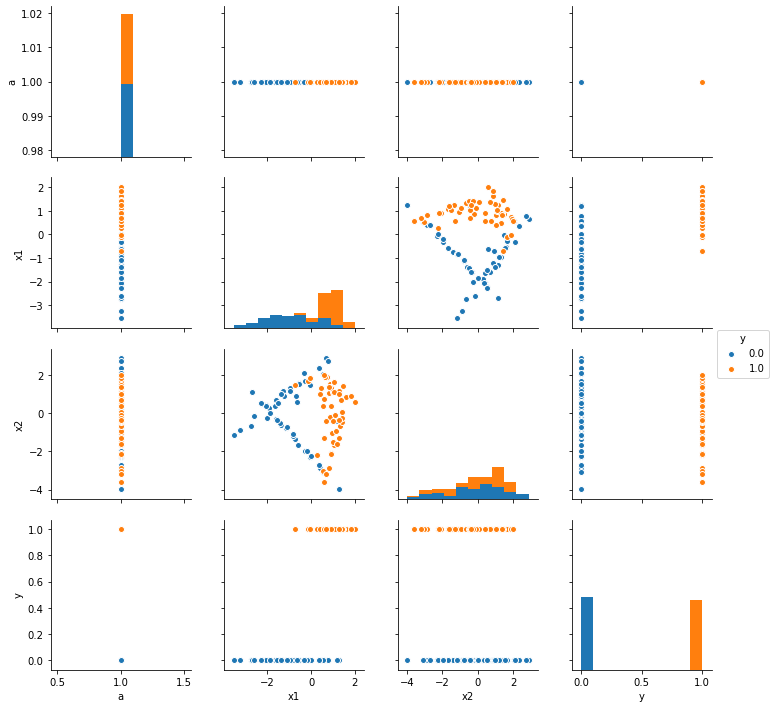

In [257]:
sns.pairplot(df, hue="y")


In [282]:
def gradient_descent_log(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    m = x.shape[0] # 100
    theta = np.ones(3) # [ 1.  1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis_0 = np.dot(x, theta) # матричное произведение
        hypothesis = 1.0/(1.0+np.exp(-hypothesis_0))
        loss = hypothesis - y
        J = np.sum(-y * np.log(hypothesis)-(1-y)*np.log(1-hypothesis))
        J_1 = np.sum(np.log(1 + np.exp(-y*hypothesis_0))) #в треде написано 2 функции, ожидал что они равны, но по факту выводит разный результат. Но въезжаю...
        #print( "iter %s | J: %.3f | J_1: %.3f" % (iter, J, J_1) )
        gradient = np.dot(x_transpose, loss) #произведение потерь и x
        theta = theta - alpha * gradient  # update
    return theta

In [285]:
%%time
alpha = 0.01
theta = gradient_descent_log(alpha, x, y, 10000)

Wall time: 436 ms


In [286]:
theta

array([-0.70298097,  2.90248015,  0.15632248])

In [287]:
# построим полученную линию из theta
y_predict = []
for i in x:
    y_predict.append(1/(1+exp(-1*(theta[0] + theta[1]*i[1]+ theta[2]*i[2]))))

In [288]:
y_predict = np.array(y_predict)

In [289]:
df = np.c_[x,y,np.round(y_predict)]
df = pd.DataFrame(data=df)
df.columns = ['a','x1','x2','y','y_predict']
df.head(10)

,a,x1,x2,y,y_predict
0,1.0,-1.582773,0.684918,0.0,0.0
1,1.0,-2.052907,0.401974,0.0,0.0
2,1.0,1.268808,-1.330203,1.0,1.0
3,1.0,0.666392,2.863175,0.0,1.0
4,1.0,0.907552,0.384912,1.0,1.0
5,1.0,-0.746428,-1.374389,0.0,0.0
6,1.0,-0.034860,1.471339,0.0,0.0
7,1.0,0.900185,-2.087278,1.0,1.0
8,1.0,1.612453,0.862480,1.0,1.0
9,1.0,-2.738118,-0.674894,0.0,0.0


In [294]:
df.groupby(['y']).y.count()

y
0.0    51
1.0    49
Name: y, dtype: int64

In [295]:
df.groupby(['y_predict']).y.count()

y_predict
0.0    47
1.0    53
Name: y, dtype: int64

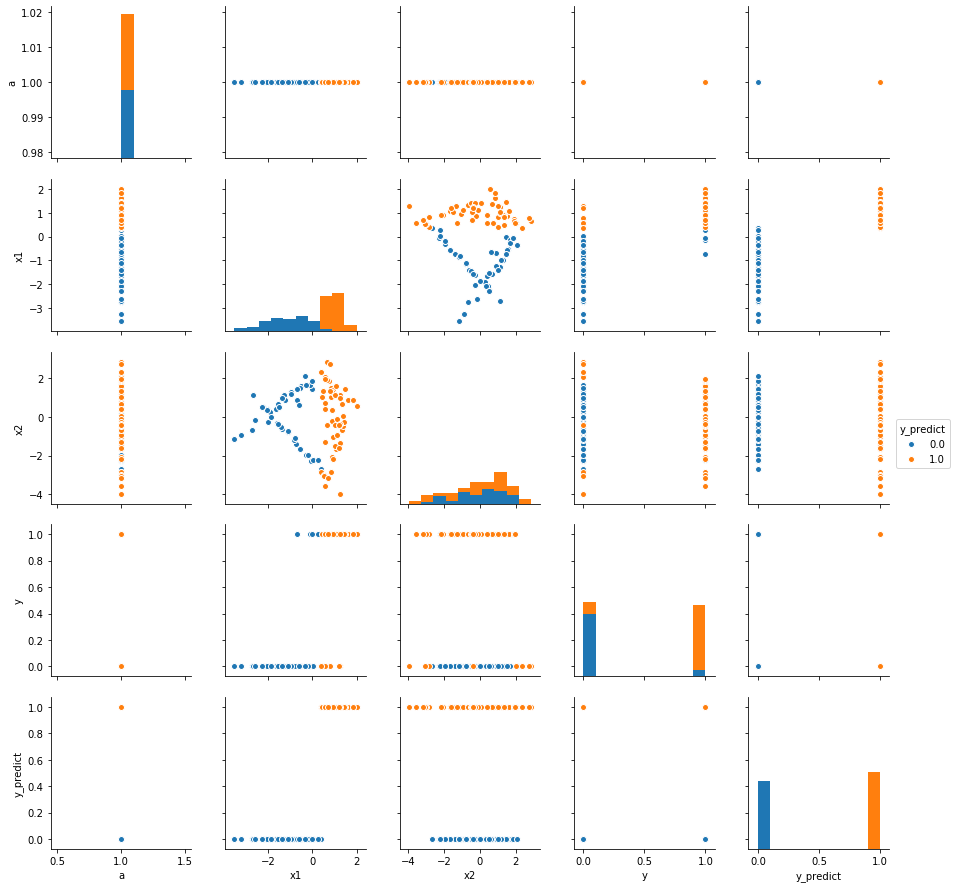

In [290]:
sns.pairplot(df, hue="y_predict")

In [296]:
#https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/logistic_regression/logistic_regression.py
#https://www.machinelearningmastery.ru/implement-logistic-regression-stochastic-gradient-descent-scratch-python/
#https://dyakonov.org/2018/03/12/%d0%bb%d0%be%d0%b3%d0%b8%d1%81%d1%82%d0%b8%d1%87%d0%b5%d1%81%d0%ba%d0%b0%d1%8f-%d1%84%d1%83%d0%bd%d0%ba%d1%86%d0%b8%d1%8f-%d0%be%d1%88%d0%b8%d0%b1%d0%ba%d0%b8/

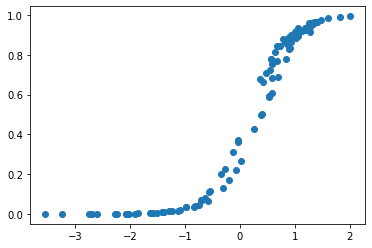

In [301]:
plt.plot(x[:,1],y_predict,'o')

In [242]:
#Посмотрим готовые решения

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing

In [267]:
model = LogisticRegression()


In [268]:
lab_enc = preprocessing.LabelEncoder()
y_1 = lab_enc.fit_transform(y)

In [269]:
model.fit( x, y_1 )
predictions = model.predict_proba( x )

In [270]:
model.score(x, y_1)

0.87

In [271]:
#да точности вообще нет.
#но это как то и норма, так как по факту лог регрессия для классификационных задач, а тут совершенно другие данные

In [272]:
model_1 = linear_model.SGDRegressor( alpha = 0.01, max_iter = 10000#,learning_rate="constant",penalty = None,eta0=1
                                   )

In [273]:
model_1.fit( x, y_1 )

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [274]:
model_1.intercept_, model_1.coef_

(array([0.254668]), array([0.24956783, 0.28178739, 0.0121604 ]))

In [275]:
theta

array([-0.70298097,  2.90248015,  0.15632248])